In [0]:
# https://keras.io/
!pip install -q keras
import keras

In [0]:
import numpy as np

from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten, Add
from keras.layers import Convolution2D, MaxPooling2D
from keras.utils import np_utils

from keras.datasets import mnist

In [0]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

(60000, 28, 28)


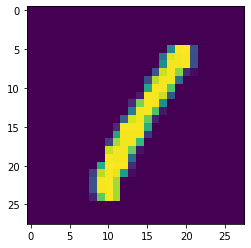

In [12]:
print (X_train.shape)
from matplotlib import pyplot as plt
%matplotlib inline
plt.imshow(X_train[3])

In [0]:
X_train = X_train.reshape(X_train.shape[0], 28, 28,1)
X_test = X_test.reshape(X_test.shape[0], 28, 28,1)

In [0]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

In [17]:
y_train[:10]

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4], dtype=uint8)

In [0]:
# Convert 1-dimensional class arrays to 10-dimensional class matrices
Y_train = np_utils.to_categorical(y_train, 10)
Y_test = np_utils.to_categorical(y_test, 10)

In [19]:
Y_train[:10]

array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]], dtype=float32)

In [20]:
from keras.layers import Activation, MaxPooling2D
model = Sequential()

 
model.add(Convolution2D(32, 3, 3, activation='relu', input_shape=(28,28,1)))
model.add(Convolution2D(32, 3, activation='relu'))
model.add(Convolution2D(32, 3, activation='relu'))
model.add(Convolution2D(32, 3, activation='relu'))
model.add(MaxPooling2D(2))
model.add(Convolution2D(32, 3, activation='relu'))
model.add(Convolution2D(32, 3, activation='relu'))
model.add(Convolution2D(10, 1, activation='relu'))
model.add(Convolution2D(10, 6))
model.add(Flatten())
model.add(Activation('softmax'))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), activation="relu", input_shape=(28, 28, 1...)`
  """


In [21]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 24, 24, 32)        9248      
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 22, 22, 32)        9248      
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 20, 20, 32)        9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 10, 10, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 8, 8, 32)          9248      
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 6, 6, 32)         

In [0]:
model.compile(loss='categorical_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])

In [24]:
model.fit(X_train, Y_train, batch_size=32, nb_epoch=10, verbose=1)

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  """Entry point for launching an IPython kernel.





Epoch 1/10





60000/60000 [==============================] - 229s 4ms/step - loss: 0.5940 - acc: 0.7904
Epoch 2/10
60000/60000 [==============================] - 223s 4ms/step - loss: 0.1247 - acc: 0.9624
Epoch 3/10
60000/60000 [==============================] - 225s 4ms/step - loss: 0.0887 - acc: 0.9722
Epoch 4/10
60000/60000 [==============================] - 228s 4ms/step - loss: 0.0709 - acc: 0.9785
Epoch 5/10
60000/60000 [==============================] - 232s 4ms/step - loss: 0.0583 - acc: 0.9824
Epoch 6/10
60000/60000 [==============================] - 231s 4ms/step - loss: 0.0479 - acc: 0.9854
Epoch 7/10
60000/60000 [==============================] - 230s 4ms/step - loss: 0.0425 - acc: 0.9868
Epoch 8/10
60000/60000 [==============================] - 225s 4ms/step - loss: 0.0390 - acc: 0.9881
Epoch 9/10
60000/60000 [==============================] - 228s 4ms/step - loss: 0.0354 - acc: 0.9888
Epoch 10/10
60000/60000 [==============================] - 228s 4ms/step - loss: 0.

In [0]:
score = model.evaluate(X_test, Y_test, verbose=0)

In [28]:
print(score)

[0.04254276682498166, 0.9864]


In [0]:
y_pred = model.predict(X_test)

In [30]:
print(y_pred[:9])
print(y_test[:9])

[[2.8492327e-11 5.7345741e-13 8.9356553e-07 6.6935527e-08 1.2025931e-18
  4.4102708e-10 1.2615622e-18 9.9999905e-01 1.6738669e-10 7.0802013e-09]
 [1.8567344e-09 5.7700942e-09 9.9999976e-01 1.7415270e-14 1.3984543e-14
  7.8636061e-13 2.0024879e-07 1.3129003e-13 3.0259263e-12 3.0399179e-17]
 [2.8827401e-06 9.9972516e-01 9.6411277e-05 5.6915530e-07 6.6870722e-05
  6.4047508e-06 1.5665818e-06 2.0143270e-05 7.9901918e-05 5.3426700e-08]
 [9.9994981e-01 6.9070607e-15 1.9724579e-08 1.3012263e-11 3.6734990e-12
  5.8591247e-09 4.9537324e-05 5.4336407e-11 7.9482632e-08 5.7548641e-07]
 [7.5156814e-09 1.0777852e-13 3.2848532e-10 6.9368352e-15 9.9999785e-01
  3.1233929e-11 6.3260071e-11 4.5012983e-11 6.2777150e-10 2.1137130e-06]
 [1.8408130e-06 9.9983394e-01 1.7963272e-05 1.2094413e-08 4.0184375e-05
  1.4165324e-06 1.0714810e-08 6.2505977e-05 4.1662268e-05 3.8614760e-07]
 [1.3851949e-18 2.1157831e-10 5.0508353e-10 6.5378990e-14 9.9999464e-01
  1.1557603e-08 1.8318347e-16 7.9533917e-09 5.2975283e-06 

In [0]:
layer_dict = dict([(layer.name, layer) for layer in model.layers])

In [31]:
import numpy as np
from matplotlib import pyplot as plt
from keras import backend as K
%matplotlib inline
# util function to convert a tensor into a valid image
def deprocess_image(x):
    # normalize tensor: center on 0., ensure std is 0.1
    x -= x.mean()
    x /= (x.std() + 1e-5)
    x *= 0.1

    # clip to [0, 1]
    x += 0.5
    x = np.clip(x, 0, 1)

    # convert to RGB array
    x *= 255
    #x = x.transpose((1, 2, 0))
    x = np.clip(x, 0, 255).astype('uint8')
    return x

def vis_img_in_filter(img = np.array(X_train[2]).reshape((1, 28, 28, 1)).astype(np.float64), 
                      layer_name = 'conv2d_14'):
    layer_output = layer_dict[layer_name].output
    img_ascs = list()
    for filter_index in range(layer_output.shape[3]):
        # build a loss function that maximizes the activation
        # of the nth filter of the layer considered
        loss = K.mean(layer_output[:, :, :, filter_index])

        # compute the gradient of the input picture wrt this loss
        grads = K.gradients(loss, model.input)[0]

        # normalization trick: we normalize the gradient
        grads /= (K.sqrt(K.mean(K.square(grads))) + 1e-5)

        # this function returns the loss and grads given the input picture
        iterate = K.function([model.input], [loss, grads])

        # step size for gradient ascent
        step = 5.

        img_asc = np.array(img)
        # run gradient ascent for 20 steps
        for i in range(20):
            loss_value, grads_value = iterate([img_asc])
            img_asc += grads_value * step

        img_asc = img_asc[0]
        img_ascs.append(deprocess_image(img_asc).reshape((28, 28)))
        
    if layer_output.shape[3] >= 35:
        plot_x, plot_y = 6, 6
    elif layer_output.shape[3] >= 23:
        plot_x, plot_y = 4, 6
    elif layer_output.shape[3] >= 11:
        plot_x, plot_y = 2, 6
    else:
        plot_x, plot_y = 1, 2
    fig, ax = plt.subplots(plot_x, plot_y, figsize = (12, 12))
    ax[0, 0].imshow(img.reshape((28, 28)), cmap = 'gray')
    ax[0, 0].set_title('Input image')
    fig.suptitle('Input image and %s filters' % (layer_name,))
    fig.tight_layout(pad = 0.3, rect = [0, 0, 0.9, 0.9])
    for (x, y) in [(i, j) for i in range(plot_x) for j in range(plot_y)]:
        if x == 0 and y == 0:
            continue
        ax[x, y].imshow(img_ascs[x * plot_y + y - 1], cmap = 'gray')
        ax[x, y].set_title('filter %d' % (x * plot_y + y - 1))

vis_img_in_filter()

NameError: ignored